In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px

In [ ]:
# Dataset found and borrowed from Github user ShefaaSaied
df = pd.read_csv('https://raw.githubusercontent.com/ShefaaSaied/Telco-customer-churn-prediction/main/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#df
df[0:9]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [ ]:
clean_df = df.drop('customerID', axis=1)

for col in clean_df.columns:
  if (clean_df[col].dtype == np.number):
    continue
  clean_df[col] = LabelEncoder().fit_transform(clean_df[col])

print(clean_df.dtypes)

<ipython-input-3-226ab538d6b9>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if (clean_df[col].dtype == np.number):


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object


In [ ]:
print(clean_df.head(10))

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   
5       0              0        0           0       8             1   
6       1              0        0           1      22             1   
7       0              0        0           0      10             0   
8       0              0        1           0      28             1   
9       1              0        0           1      62             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0 

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

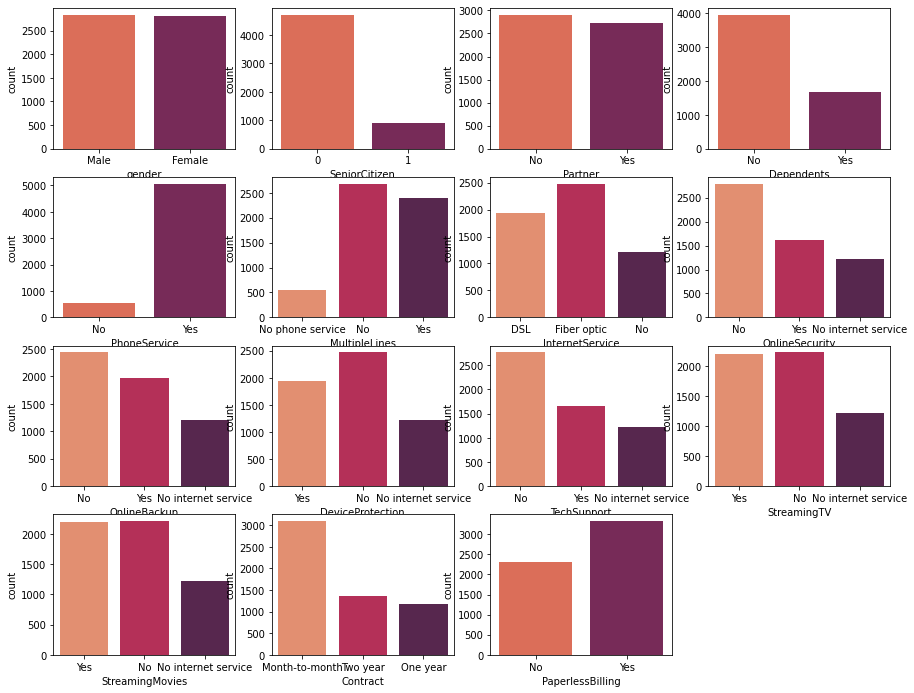

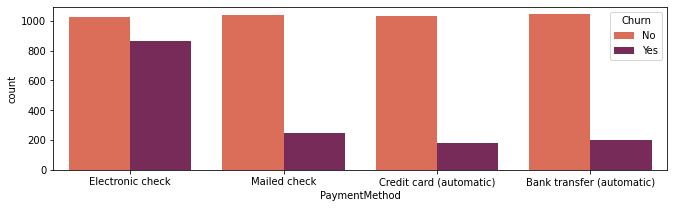

<Figure size 432x288 with 0 Axes>

In [ ]:
categories = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(categories):
    ax = plt.subplot(5, 4, n + 1)
    g = sns.countplot(data=train_df, x=train_df[variable], ax=ax, palette='rocket_r')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x = 'PaymentMethod', hue = 'Churn', data=train_df, palette = 'rocket_r')
plt.show() 
plt.tight_layout()

In [ ]:
# Scale the data set:
x = clean_df.drop('Churn', axis=1)
y = clean_df['Churn']
x = StandardScaler().fit_transform(x)

# Split the data 80 training/20 testing:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

**Logistic Regression**

In [ ]:
Logreg = LogisticRegression()
Logreg.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
# Create predictions from the test data:
predictions = Logreg.predict(xtest)
print(predictions)

[0 1 1 ... 0 0 1]


In [ ]:
# accuracy of classifications:
report = classification_report(ytest, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1021
           1       0.71      0.56      0.62       388

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



**Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

params = {'C': [1,2,3],
          'kernel': ['linear', 'poly', 'rbf'],
          'gamma':['scale','auto'],
          'class_weight':['None', 'dict', 'balanced']}
model = svm.SVC()
gsc_svm = GridSearchCV(model, params, scoring='roc_auc', cv=5, return_train_score=True, n_jobs = 5) 

In [ ]:
gsc_svm.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 718, in _validate_targets
    self.class_weight_ = compute_class_weight(self.class_weight, classes=cls, y=y_)
  File "/u

GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [1, 2, 3],
                         'class_weight': ['None', 'dict', 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='roc_auc')

In [ ]:
print(gsc_svm.best_params_)
print(gsc_svm.best_score_)

{'C': 3, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.838612100812799


In [ ]:
model.fit(xtrain, ytrain)

SVC()

In [ ]:
model.score(xtrain, ytrain)

0.8205537806176784

In [ ]:
from sklearn.metrics import accuracy_score
test_pred = model.predict(xtest)
accuracy_score(test_pred, ytest)

0.8097941802696949

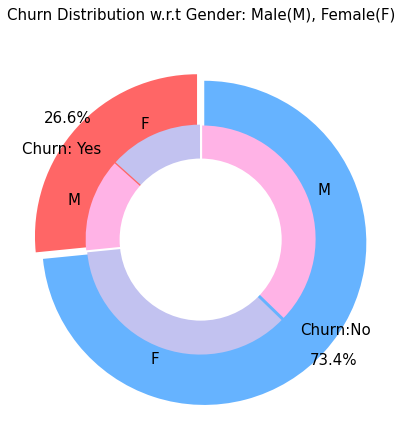

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

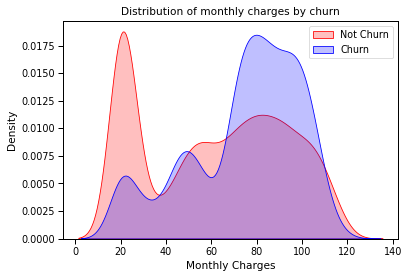

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

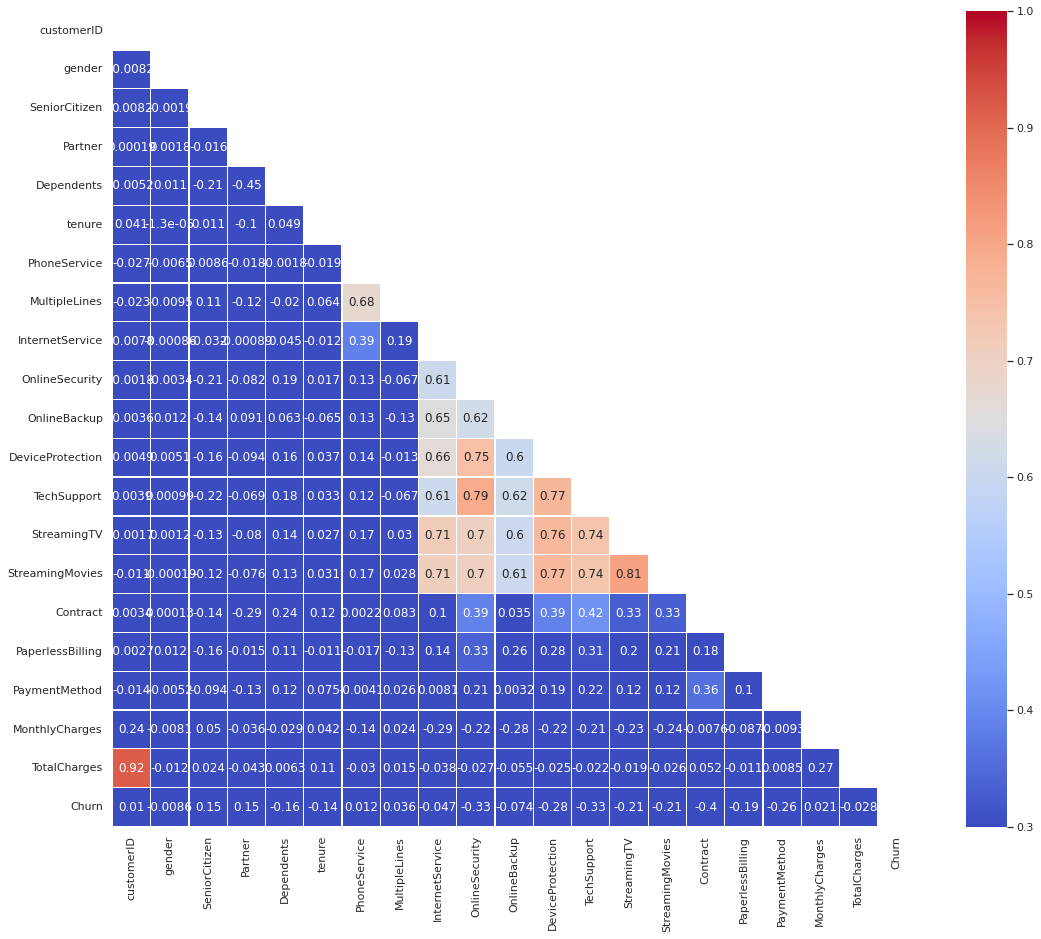

In [ ]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)